In [1]:
import ast
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

<h1> <span style="color:red;"> Step 1:- Load Data</span></h1>

In [2]:
movie_info=pd.read_csv('../data/tmdb-movie-metadata/tmdb_5000_credits.csv')
movie_detailed_info=pd.read_csv('../data/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [3]:
movie_info

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
movie_detailed_info

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

The 1st dataset columns are:-

<ol>
<li>movie_id - A unique identifier for each movie.</li>
<li>title - The name of the movie.</li>
<li>cast - The name of lead and supporting actors.</li>
<li>crew - The name of Director, Editor, Composer, Writer etc.</li>
</ol>
The 2nd dataset columns are:-
<ol>
<li>budget - The budget in which the movie was made.</li>
<li>genre - The genre of the movie, Action, Comedy ,Thriller etc.</li>
<li>homepage - A link to the homepage of the movie.</li>
<li>id - This is infact the movie_id as in the first dataset.</li>
<li>keywords - The keywords or tags related to the movie.</li>
<li>original_language - The language in which the movie was made.</li>
<li>original_title - The title of the movie before translation or adaptation.</li>
<li>overview - A brief description of the movie.</li>
<li>popularity - A numeric quantity specifying the movie popularity.</li>
<li>production_companies - The production house of the movie.</li>
<li>production_countries - The country in which it was produced.</li>
<li>release_date - The date on which it was released.</li>
<li>revenue - The worldwide revenue generated by the movie.</li>
<li>runtime - The running time of the movie in minutes.</li>
<li>status - "Released" or "Rumored".</li>
<li>tagline - Movie's tagline.</li>
<li>title - Title of the movie.</li>
<li>vote_average - average ratings the movie recieved.</li>
<li>vote_count - the count of votes recieved.</li>
</ol>
Let's create one dataset from above two dataset. To do that lets join the two dataset on the 'id' column


In [5]:
merged_df = pd.merge(left=movie_info, right=movie_detailed_info, left_on='movie_id', right_on='id', how='inner')

In [6]:
merged_df.shape[0] #total number of entries in the dataset

4803

In [7]:
merged_df.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<h1> <span style="color:red;"> Step 2:- EDA</span></h1>

<h2> <span style="color:blue;">&nbsp;&nbsp;&nbsp;1. Basic Preprocessing </span></h2> 

In [8]:
merged_df.drop_duplicates(inplace=True)

In [9]:
merged_df[['vote_average', 'vote_count','title_x']].isnull().sum() #no handling required

vote_average    0
vote_count      0
title_x         0
dtype: int64

<h2> <span style="color:blue;">&nbsp;&nbsp;&nbsp;2. Feature Engineering </span></h2> 

<h3> <span style="color:green;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Drop Unnecessary Columns</span></h3> 

In [9]:
merged_df.drop("id",axis=1,inplace=True)

lets see if we have any entries where title does not match

In [10]:
merged_df[merged_df["title_x"]!=merged_df["title_y"]]

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count


There is none so without any checking which column shows better result we can drop any of the duplicate column and rename it with original column name

In [11]:
merged_df.drop("title_y", inplace=True, axis=1)
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

In [12]:
merged_df[merged_df["title"]!=merged_df["original_title"]][["original_language","title","original_title"]].head(5)

,original_language,title,original_title
97,ja,Shin Godzilla,シン・ゴジラ
215,en,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,fr,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,zh,The Flowers of War,金陵十三釵
474,fr,Evolution,Évolution


In [13]:
merged_df[(merged_df["title"]!=merged_df["original_title"])&(merged_df["original_language"]=='en')][
    ["original_language","title","original_title"]].head(5)

,original_language,title,original_title
215,en,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
488,en,Arthur and the Invisibles,Arthur et les Minimoys
561,en,Two Brothers,Deux frères
719,en,This Is It,Michael Jackson's This Is It
1255,en,The Impossible,Lo imposible


From above two cell output we can see "original_title" column will not help much in our analysis as we will only handle english language, so we can drop this column. also "homepage" column does not add anything extra in the analysis so we will drop this one too.

In [14]:
merged_df.drop(columns=["original_title","homepage"],inplace=True, axis=1)

<h3> <span style="color:green;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Modify Unreadable Data with Useful Data</span></h3> 

We have a few columns containing dictionaries, which are difficult to process. Therefore, we will identify the top 10 relevant data entries from the specified column and repopulate them. For future reference, we will refrain from modifying anything in the existing dataframe but will instead create a new dataframe. 
<ul>
    <li>cast</li>
    <li>crew</li>
    <li>genres</li>
    <li>keywords</li>
    <li>production_companies</li>
    <li>production_countries</li>
    <li>spoken_languages</li>
</ul>

In [15]:
movies_df=merged_df.copy()

-> Before modifying the data, let's examine how the data in these columns are currently populated and visualize how it will appear after the modifications.

In [16]:
ast.literal_eval(movies_df["spoken_languages"][0]) #run this cell for all the columns mentioned above

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [17]:
#run this cell for all the columns mentioned above
list(set([i["name"] for i in ast.literal_eval(movies_df["spoken_languages"][0])][:10]))

['Español', 'English']

In [18]:
#write function to implement above change
def get_first_10_names(row):
    row_list = ast.literal_eval(row)
    first_10_unique_names = set([i["name"] for i in row_list][:10])
    first_10_names = ", ".join(f"{name.replace(' ', '')}" for name in first_10_unique_names)
    return first_10_names

# Apply the function to the column containing lists of dictionaries
movies_df['cast'] = movies_df['cast'].apply(get_first_10_names)
movies_df['crew'] = movies_df['crew'].apply(get_first_10_names)
movies_df['genres'] = movies_df['genres'].apply(get_first_10_names)
movies_df['keywords'] = movies_df['keywords'].apply(get_first_10_names)
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(get_first_10_names)
movies_df['production_companies'] = movies_df['production_companies'].apply(get_first_10_names)
movies_df['production_countries'] = movies_df['production_countries'].apply(get_first_10_names)

In [19]:
movies_df.head(3)

,movie_id,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"WesStudi, JoelDavidMoore, SigourneyWeaver, Zoe...","ChristopherBoyes, RickCarter, StephenE.Rivkin,...",237000000,"Action, Adventure, ScienceFiction, Fantasy","space, alien, cultureclash, future, spacecolon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"DuneEntertainment, LightstormEntertainment, In...","UnitedKingdom, UnitedStatesofAmerica",2009-12-10,2787965087,162.0,"Español, English",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"BillNighy, OrlandoBloom, JackDavenport, ChowYu...","HansZimmer, CraigWood, TedElliott, StephenE.Ri...",300000000,"Action, Adventure, Fantasy","exoticisland, traitor, shipwreck, strongwoman,...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"SecondMateProductions, JerryBruckheimerFilms, ...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"MonicaBellucci, ChristophWaltz, LéaSeydoux, Na...","JohnLogan, BillBernstein, AnnaPinnock, DennisG...",245000000,"Action, Crime, Adventure","unitedkingdom, mi6, britishsecretservice, spy,...",en,A cryptic message from Bond’s past sends him o...,107.376788,"Danjaq, B24, ColumbiaPictures","UnitedKingdom, UnitedStatesofAmerica",2015-10-26,880674609,148.0,"Italiano, Español, English, Français, Deutsch",Released,A Plan No One Escapes,6.3,4466


<h1> <span style="color:red;"> Step 3:- Recommendation Systems</span></h1>

<h2> <span style="color:blue;">&nbsp;&nbsp;&nbsp;1. Popularity Based Recommendation System </span></h2>

In [20]:
movies_df.head(2)

,movie_id,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"WesStudi, JoelDavidMoore, SigourneyWeaver, Zoe...","ChristopherBoyes, RickCarter, StephenE.Rivkin,...",237000000,"Action, Adventure, ScienceFiction, Fantasy","space, alien, cultureclash, future, spacecolon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"DuneEntertainment, LightstormEntertainment, In...","UnitedKingdom, UnitedStatesofAmerica",2009-12-10,2787965087,162.0,"Español, English",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"BillNighy, OrlandoBloom, JackDavenport, ChowYu...","HansZimmer, CraigWood, TedElliott, StephenE.Ri...",300000000,"Action, Adventure, Fantasy","exoticisland, traitor, shipwreck, strongwoman,...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"SecondMateProductions, JerryBruckheimerFilms, ...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500


We can see the "popularity" column, which shows how popular a movie is. Using this column, we can perform the following analyses:
<ol>
<li><b>Visualize Popularity Distribution:</b></li> We can create histograms or density plots to visualize the distribution of movie popularity scores. This can help us understand how popularity is distributed across our dataset.

<li><b>Correlation Analysis:</b></li> We can analyze the correlation between the "popularity" column and other numerical columns like "vote_average" and "vote_count". From the chart above, we can see that more popular movies sometimes rank lower. By conducting this analysis, we can gain insights into whether highly popular movies tend to have higher ratings or more votes.

<li><b>Feature Engineering:</b></li> We could use the "popularity" column as a feature in out futute machine learning models.

<li><b>Ranking and Filtering:</b></li> Before creating the top "n" movies list, we can use the "popularity" column to filter out less popular movies from our analysis. Alternatively, we can create a metric that includes the popularity score as well.
</ol>

First lets see the distribution of the popularity column

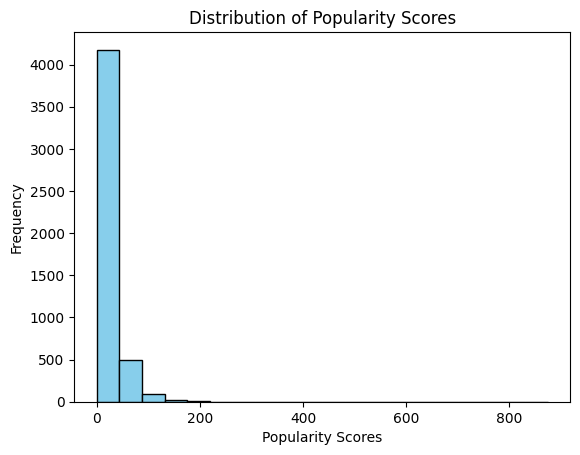

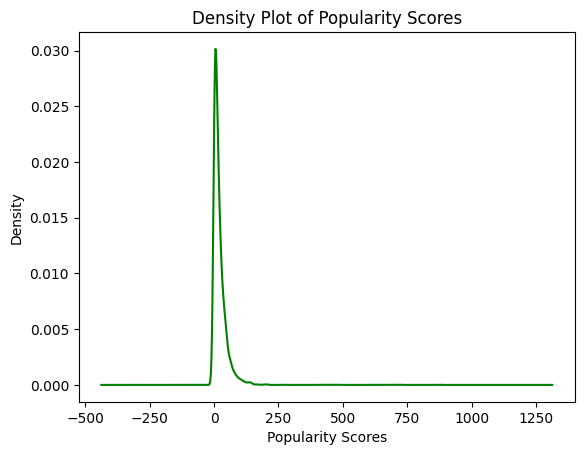

In [21]:
popularity_values = movies_df['popularity']
#histogram
plt.hist(popularity_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')
plt.show()
plt.figure()
#density plot
popularity_values.plot(kind='density', color='green')
plt.xlabel('Popularity Scores')
plt.ylabel('Density')
plt.title('Density Plot of Popularity Scores')
plt.show()

Observation:- We can see the popularity scores are not evenly distributed and most of the movies are not very popular.

First lets see top 5 most popular movies and vote distribution

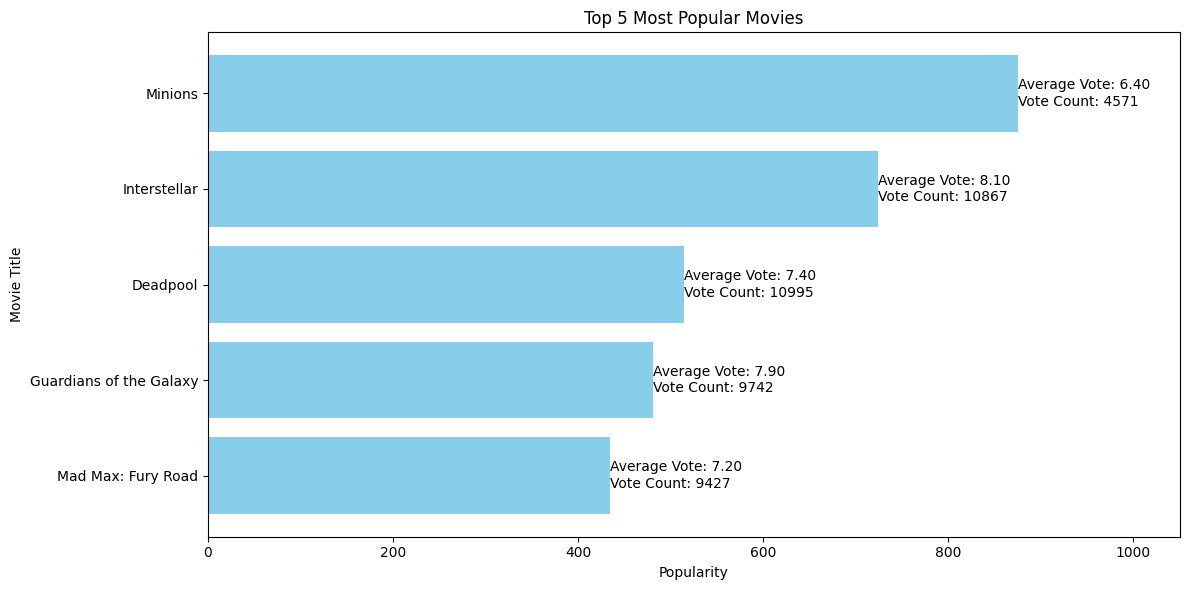

In [22]:
pop = movies_df.sort_values('popularity', ascending=False).head(5)
plt.figure(figsize=(12, 6))
bars = plt.barh(pop['title'], pop['popularity'], color='skyblue')
#annotations for vote average and vote count
for bar, avg, count in zip(bars, pop['vote_average'], pop['vote_count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'Average Vote: {avg:.2f}\nVote Count: {count}',
             va='center', ha='left', fontsize=10, color='black')
    
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 5 Most Popular Movies')
plt.gca().invert_yaxis()  #Invert y-axis to show highest popularity at the top
plt.xlim(0, max(pop['popularity']) * 1.2)
plt.tight_layout()
plt.show()

The difference between the most popular movie (800+) and the 5th popular movie (400+) is significant, with a margin of 400+. However, popularity does not necessarily correlate with high voting scores. Let's explore their correlation.

In [23]:
correlation_matrix = movies_df[['popularity', 'vote_average', 'vote_count']].corr()
correlation_matrix

,popularity,vote_average,vote_count
popularity,1.000000,0.273952,0.778130
vote_average,0.273952,1.000000,0.312997
vote_count,0.778130,0.312997,1.000000


While popular movies tend to receive more votes, this doesn’t always lead to higher average voting scores. Therefore, including popularity in the metric may not be sensible. We will explore other columns for the Popularity-based recommender system.

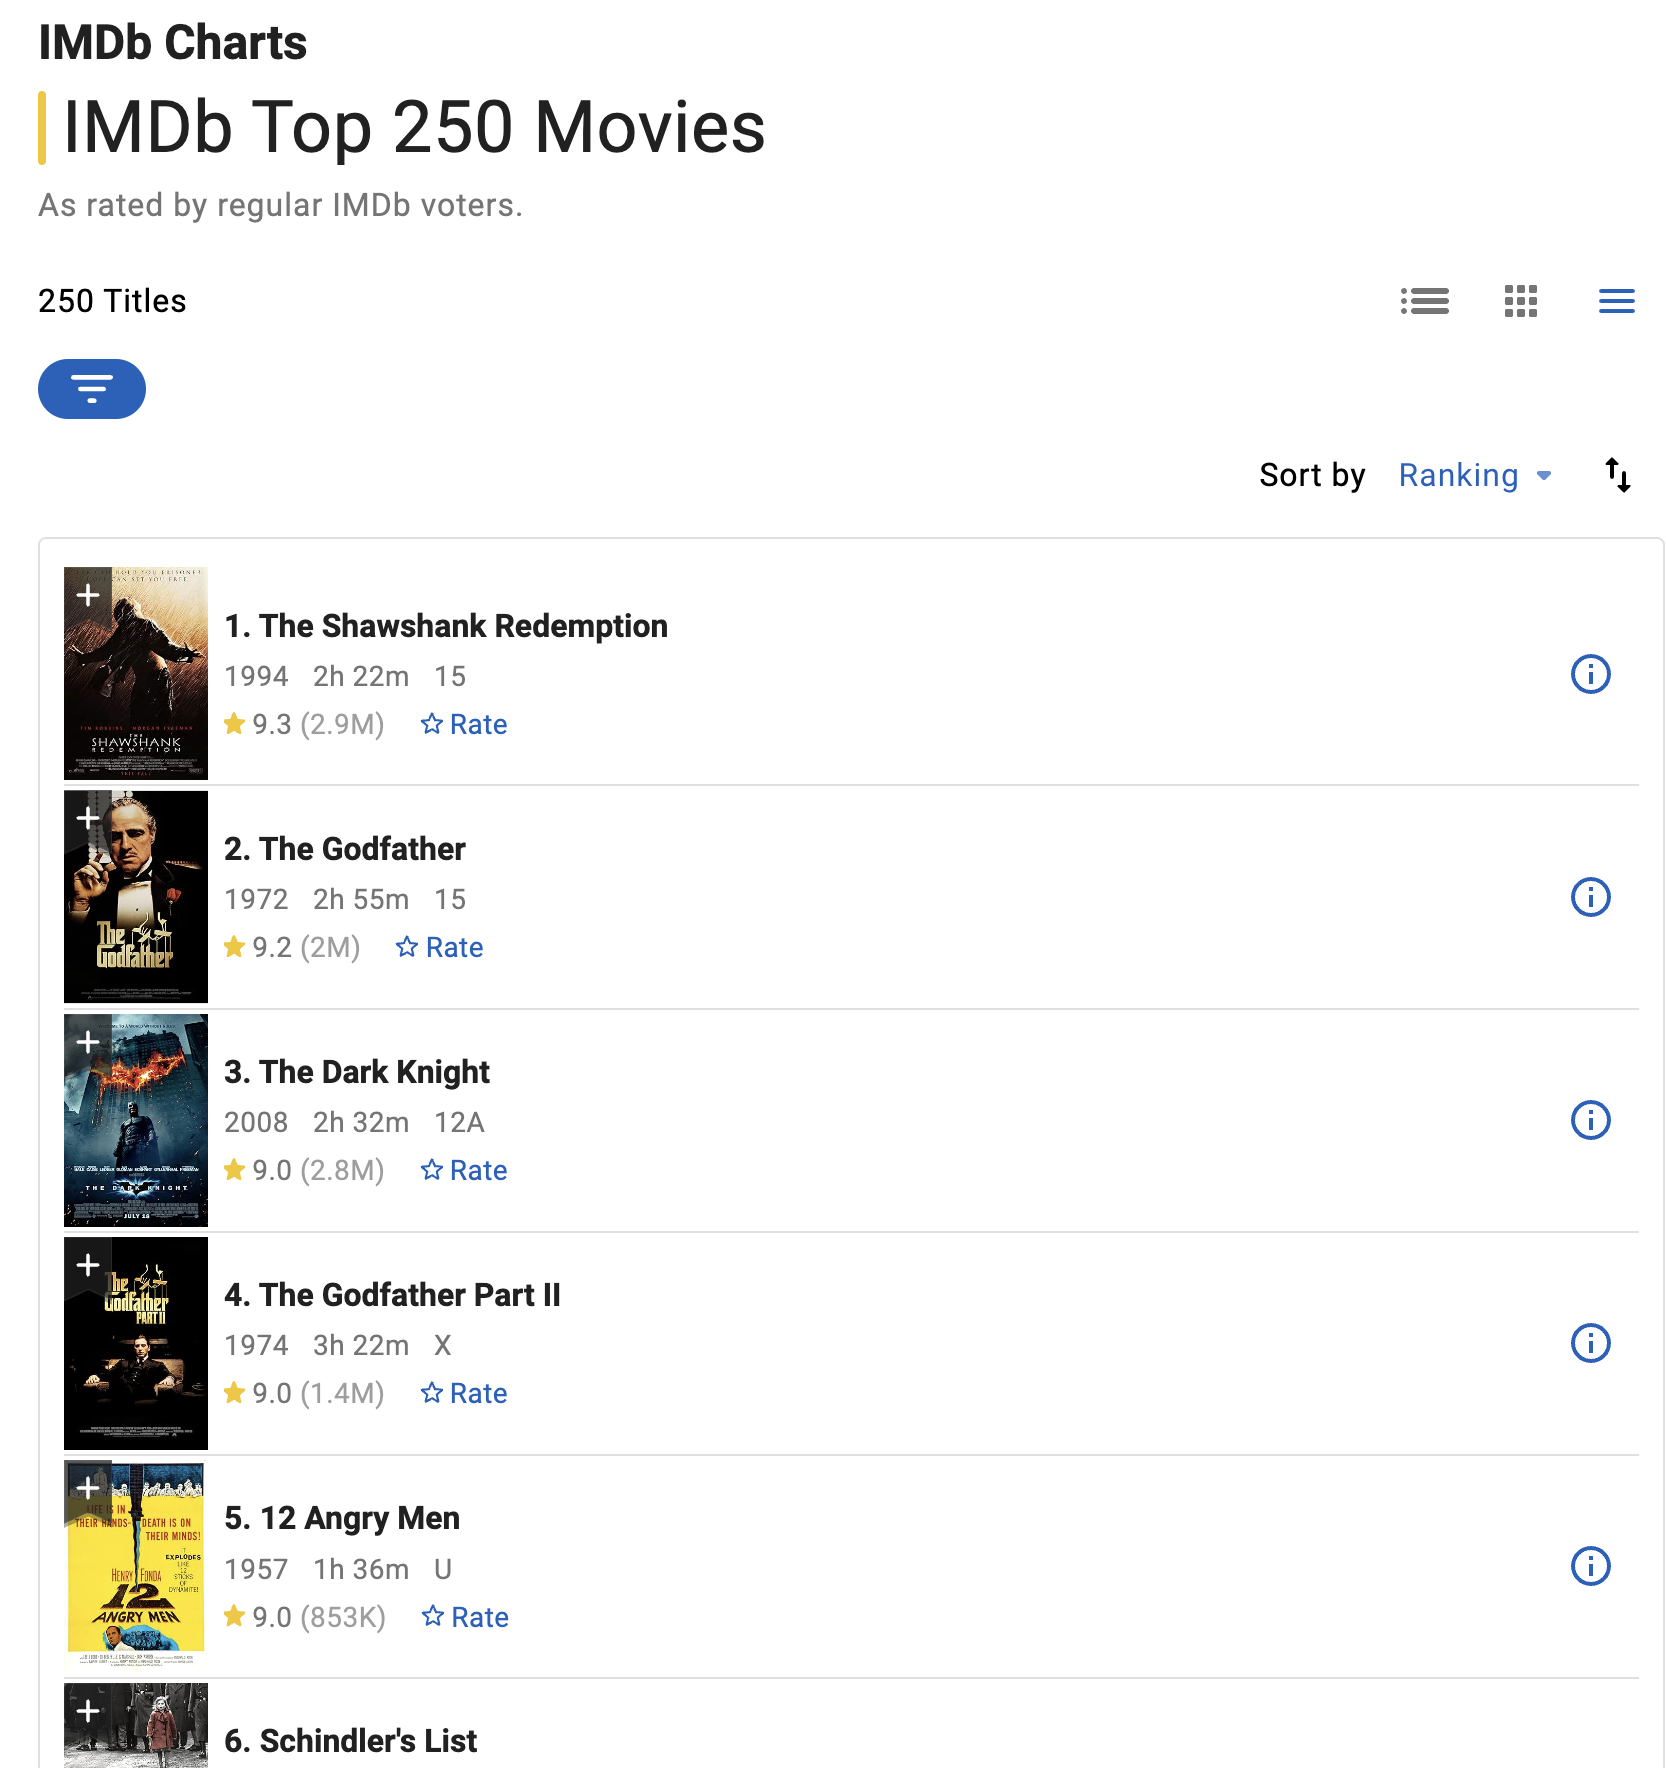

<h3><span style="color:green;">TMDB Top "n" Movies</span></h3>
This recommendation system would simply recommend the top-rated (most voted) movies to users, regardless of their individual preferences or past behavior. While popularity-based recommendation systems are straightforward to implement and can provide useful recommendations for new users or in scenarios where personalized data is limited (example:- our dataset).

Reference: [IMDB Top 250 Movies](https://www.imdb.com/chart/top/?ref_=nb_mv_3_chttp)

To create the same page, we will use the same metric as IMDB, which is the weighted rating. This metric provides a true Bayesian estimate of a movie's quality, taking into account both the average rating and the number of votes it has received. By using the weighted rating metric, we aim to offer users recommendations that reflect both the quality and popularity of movies.

metric formula:-
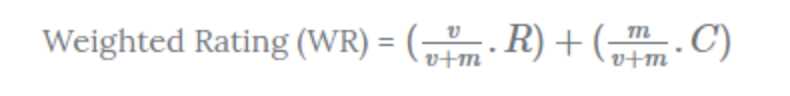

where,
<ul>
<li>v is the number of votes for the movie; [movies_df.vote_count]</li>
<li>m is the minimum votes required to be listed in the chart;</li>
<li>R is the average rating of the movie; [movies_df.vote_average] And</li>
<li>C is the mean vote across the whole report</li>
<ul>

In [24]:
v = movies_df.vote_count
R = movies_df.vote_average
C = movies_df['vote_average'].mean()
#m = Currently IMDB benchmark for m=25000 votes, let's see what will be the m value for our dataset

Previously, we examined the distribution of the 'vote_count' column in our dataset. Given the characteristics of our data, it may not be appropriate to apply the same value for m as IMDB. To determine a suitable threshold, let's begin by exploring the data using the different quantiles.

In [25]:
total_no_of_entry=movies_df.shape[0]
quantile_75 = movies_df['vote_count'].quantile(0.75)
quantile_80 = movies_df['vote_count'].quantile(0.8)
quantile_90 = movies_df['vote_count'].quantile(0.9)
max_vote = movies_df['vote_count'].max()

print("Total votes:",total_no_of_entry)
print("75th Quantile:", quantile_75)
print("80th Quantile:", quantile_80)
print("90th Quantile:", quantile_90)
print("maximum no of vote count:", max_vote)

Total votes: 4803
75th Quantile: 737.0
80th Quantile: 957.6000000000004
90th Quantile: 1838.4000000000015
maximum no of vote count: 13752


After looking at the data, we notice that there's a big gap between the 90th percentile and the highest number of votes. Because of this big difference, it might be a good idea to show fewer of the top-rated movies. For instance, instead of showing the top 250 movies we can show top 50 movies. To do this we will set threshold value of 'm' to the 90th quantile .

In [26]:
m=quantile_90

Commenting out below cell because we need weighted rating for all cell to create hybrid model. In case we not need hybrid model then we can uncomment below cell and comment out the next one.

In [27]:
movies_df['weighted_rating'] = movies_df['vote_count'] / (movies_df['vote_count'] + m) * \
                            movies_df['vote_average'] + (m / (movies_df['vote_count'] + m)) * C

print("TMDB TOP 50 MOVIES")
movies_df[["title","spoken_languages","popularity","release_date","revenue","vote_average",\
               "vote_count","weighted_rating"]].sort_values(by='weighted_rating', ascending=False).head(50)

TMDB TOP 50 MOVIES


,title,spoken_languages,popularity,release_date,revenue,vote_average,vote_count,weighted_rating
1881,The Shawshank Redemption,English,136.747729,1994-09-23,28341469,8.5,8205,8.059258
662,Fight Club,English,146.757391,1999-10-15,100853753,8.3,9413,7.939256
65,The Dark Knight,"普通话, English",187.322927,2008-07-16,1004558444,8.2,12002,7.920020
3232,Pulp Fiction,"Español, English, Français",121.463076,1994-10-08,213928762,8.3,8428,7.904645
96,Inception,"Français, English, 日本語",167.583710,2010-07-14,825532764,8.1,13752,7.863239
3337,The Godfather,"Italiano, English, Latin",143.659698,1972-03-14,245066411,8.4,5893,7.851236
95,Interstellar,English,724.247784,2014-11-05,675120017,8.1,10867,7.809479
809,Forrest Gump,English,138.133331,1994-07-06,677945399,8.2,7927,7.803188
329,The Lord of the Rings: The Return of the King,English,123.630332,2003-12-01,1118888979,8.1,8064,7.727243
1990,The Empire Strikes Back,English,78.517830,1980-05-17,538400000,8.2,5879,7.697884


Our first simple recommendation system is ready. But this recommendation system does not provide the most relevant or tailored recommendations for individual users. 

<h2> <span style="color:blue;">&nbsp;&nbsp;&nbsp;2. Advanced Recommendation System </span></h2>

Previously we have created a simple and generic movie recommendation list. Now we will create a recommender system which will suggest movies which user might be interested in. We can do it in three ways
<ol>
    <li><b>Collaborative Filtering</b></li> Choose when user-item relationships present (e.g., ratings, watch history etc.)<br>
    <u>Types:-</u>
    <ol>
        <li> User Based</li>
        <li> Item Based</li>
    </ol>
    <li><b>Content Based Filtering</b></li>Choose when item-item similarities present (e.g., genres, cast, etc.)
    <li><b>Hybrid Filtering/Hybrid Recommender System</b></li>Choose when both user data and item data present
</ol>

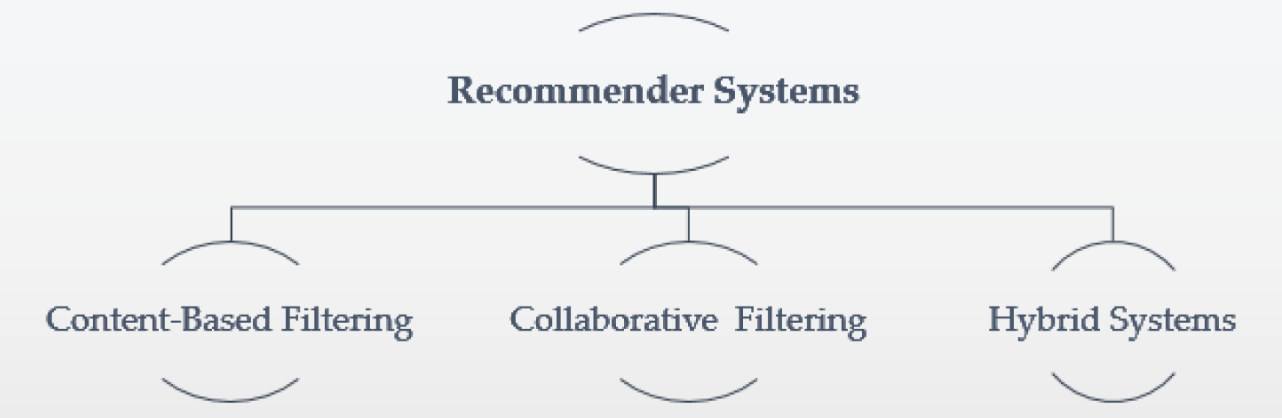

<h4><span style= "color:brown;">Which Model to Choose?</span></h4> In our dataframe we don't have user-specific data, it means we don't have explicit(SVD)/implicit(ALS) interactions or ratings provided by users for movies. In this kind of cases, collaborative filtering methods like matrix factorization will not be applicable. As matrix factorization rely on user-item interactions and we do not have that data in our dataframe. But we have item-item (movie-movie) similarity, so we can make recommendations based on similarities between movies. So we can use  content based filtering on columns such as cast, crew, genres, keywords, overview, etc.

<b>Content-Based Filtering:</b>
<ol>
<li>cast and crew: These columns contain information about the actors, directors, and other crew members involved in the movie. Content-based filtering can use this data to recommend movies similar to those with the same cast or crew members.</li>
<li>genres: Describes the genres of the movie. Content-based filtering can recommend movies based on shared genres.</li>
<li>keywords: Provides keywords or tags associated with the movie. Content-based filtering can utilize these keywords to recommend movies with similar themes or topics.</li>
<li>overview: Offers a brief summary or description of the movie. Content-based filtering can analyze the textual content of overviews to recommend movies with similar plots or themes.</li>
</ol>

<b>Note1:-</b>Columns such as 'budget', 'revenue', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', and 'tagline' are not directly suitable for content-based filtering, as they contain information about the production, release, and language aspects of the movie rather than content characteristics. We can drop these columns.

<b>Note2:-</b>'vote_count' and 'vote_average' are columns which are used in collaborative filtering but as here we do not have any user specific details we will remove them too.

In [28]:
column_list=["movie_id","budget","revenue","production_companies","production_countries","original_language",
             "release_date","runtime","spoken_languages","status","tagline",
             "popularity","vote_average","vote_count"]
movies_df.drop(columns=column_list,inplace=True,axis=1)

In [29]:
movies_df.head(2)

,title,cast,crew,genres,keywords,overview,weighted_rating
0,Avatar,"WesStudi, JoelDavidMoore, SigourneyWeaver, Zoe...","ChristopherBoyes, RickCarter, StephenE.Rivkin,...","Action, Adventure, ScienceFiction, Fantasy","space, alien, cultureclash, future, spacecolon...","In the 22nd century, a paraplegic Marine is di...",7.050669
1,Pirates of the Caribbean: At World's End,"BillNighy, OrlandoBloom, JackDavenport, ChowYu...","HansZimmer, CraigWood, TedElliott, StephenE.Ri...","Action, Adventure, Fantasy","exoticisland, traitor, shipwreck, strongwoman,...","Captain Barbossa, long believed to be dead, ha...",6.665696


<h3> <span style="color:green;">Content Based Filtering</span></h3> How to do it?
<h4><b><span style="color:brown;">Steps:-</span></b></h4>
<ol>
    <li><b>Combine Features:-</b></li>We have 6 features. We will combine these features into a single text column called 'combined_features' and work with it.
    <li><b>Vectorizations:-</b></li>To understand the characteristics of the movie features, we need to convert all the text into vectors to represent movies in a common vector space. TF-IDF vectorization is well-suited for such scenarios. TF-IDF typically creates a sparse, high-dimensional feature space, where each word in the corpus becomes a feature. It is particularly effective for tasks like document similarity and aids in capturing the uniqueness of movie descriptions. Therefore, we will employ TF-IDF vectorization to convert the text data into numerical vectors.
    <li><b>Similarity Measure:-</b></li> There are several similarity measures available, including cosine similarity, Pearson correlation coefficient, Jaccard similarity, and Euclidean distance, among others. In content-based recommendation systems and for high-dimensional data, cosine similarity proves to be particularly useful. (Note: For collaborative recommendation systems, Pearson similarity often performs better than cosine similarity.) Therefore, we will utilize cosine similarity to compute similarity scores between movies, using the linear kernel.
    <li><b>Recommdation Function:-</b></li>We will define a function recommend_movies() to recommend similar movies based on the similarity scores.
</ol>

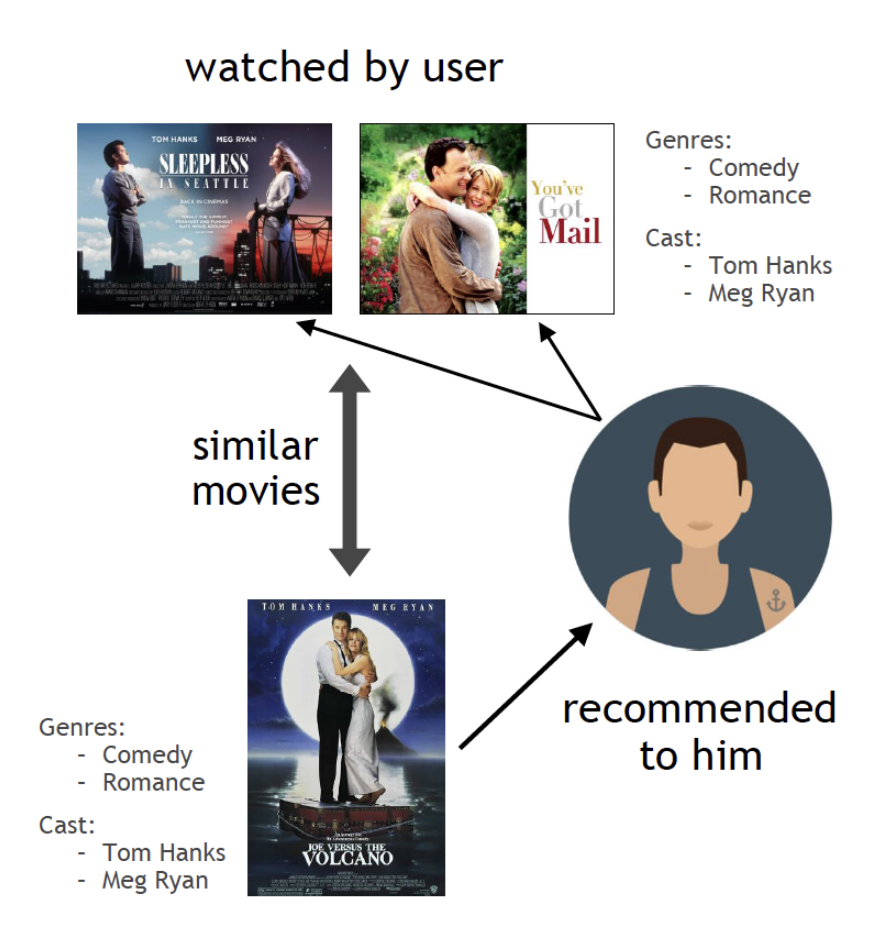

<b><span style="color:brown;">!Note-</span></b> Cosine similarity measures the cosine of the angle between two vectors, while the dot product (<i>linear kernel</i>) measures the similarity of their direction. To calculate similarity between the movies, we will use linear_kernel instead of cosine_similarity for the following reasons:
<ol>
    <li><b>Computational Efficiency:</b></li> Performance wise linear_kernel works better than cosine similarity
    <li><b>Equivalent Results:</b></li> For normalized vectors, both the linear kernel and cosine similarity gives the same result. Since we are using a TF-IDF vector, which is already normalized, using the linear kernel makes more sense. 
</ol>    

In [30]:
features = ['cast', 'crew', 'title', 'genres', 'keywords', 'overview']

movies_df[features] = movies_df[features].fillna('')
movies_df['combined_features'] = movies_df['cast'] + ',' + movies_df['crew'] + ',' + movies_df['title'] + ',' \
                                + movies_df['genres'] + ',' +movies_df['keywords'] + ' ' + movies_df['overview']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

similarity_scores = linear_kernel(tfidf_matrix, tfidf_matrix)# Compute similarity scores using linear kernel

# Function to recommend movies based on similarity scores
def recommend_movies(movie_title,num):
    
    movie_index = movies_df[movies_df['title'] == movie_title].index[0]# Get the index of the movie title
    movie_similarities = list(enumerate(similarity_scores[movie_index]))
    # Sort the movies based on similarity scores
    movie_similarities = sorted(movie_similarities, key=lambda x: x[1], reverse=True)
    # Recommend top 10 similar movies
    recommended_movies = movie_similarities[1:num+1]  # Exclude the first movie (self)
    recommended_movie_titles = [movies_df.iloc[movie[0]]['title'] for movie in recommended_movies]
    
    return recommended_movie_titles

In [31]:
recommend_movies('GoodFellas',10)

['Casino',
 'The Departed',
 'Run All Night',
 "Angela's Ashes",
 'Gangs of New York',
 'Raging Bull',
 'The Wind That Shakes the Barley',
 'This Thing of Ours',
 'Lucky Break',
 'The Age of Innocence']

In [32]:
movies_df[movies_df['title'].isin(['GoodFellas','Casino','The Departed'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
351,The Departed,"VeraFarmiga, MartinSheen, MarkWahlberg, AlecBa...","HowardShore, ChristineBeveridge, MichaelBallha...","Drama, Crime, Thriller","undercovercop, police, mole, friends, undercov...","To take down South Boston's Irish Mafia, the p...",7.361989,"VeraFarmiga, MartinSheen, MarkWahlberg, AlecBa..."
892,Casino,"RobertDeNiro, PasqualeCajano, L.Q.Jones, Sharo...","RobertRichardson, JosephP.Reidy, ThelmaSchoonm...","Drama, Crime","overdose, poker, 1970s, drugabuse, illegalpros...",The life of the gambling paradise – Las Vegas ...,6.801821,"RobertDeNiro, PasqualeCajano, L.Q.Jones, Sharo..."
1847,GoodFellas,"LorraineBracco, RobertDeNiro, FrankVincent, Pa...","MichaelBallhaus, ThelmaSchoonmaker, MartinScor...","Drama, Crime","florida, basedontruestory, massmurder, biograp...","The true story of Henry Hill, a half-Irish, ha...",7.419750,"LorraineBracco, RobertDeNiro, FrankVincent, Pa..."


In [33]:
recommend_movies('Avatar',10)

['Titan A.E.',
 'Apollo 18',
 'Aliens',
 'Star Trek Into Darkness',
 'Lifeforce',
 'Alien: Resurrection',
 'Aliens vs Predator: Requiem',
 'Alien³',
 'Gattaca',
 'Moon']

In [34]:
movies_df[movies_df['title'].isin(['Avatar','Titan A.E.','Apollo 18'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
0,Avatar,"WesStudi, JoelDavidMoore, SigourneyWeaver, Zoe...","ChristopherBoyes, RickCarter, StephenE.Rivkin,...","Action, Adventure, ScienceFiction, Fantasy","space, alien, cultureclash, future, spacecolon...","In the 22nd century, a paraplegic Marine is di...",7.050669,"WesStudi, JoelDavidMoore, SigourneyWeaver, Zoe..."
539,Titan A.E.,"DrewBarrymore, RonPerlman, NathanLane, BillPul...","GaryGoldman, JossWhedon, PaulMartinSmith, Chri...","Animation, Action, Family, ScienceFiction, Adv...","space, mission, animation, monster, galaxy, al...",A young man finds out that he holds the key to...,6.122408,"DrewBarrymore, RonPerlman, NathanLane, BillPul..."
3604,Apollo 18,"WarrenChristie, AliLiebert, KimWylie, KurtMaxR...","RobinD.Cook, TimurBekmambetov, PatrickLussier,...","Thriller, ScienceFiction, Horror","astronaut, alieninfection, moon, barbecue, moo...","Officially, Apollo 17 was the last manned miss...",5.914987,"WarrenChristie, AliLiebert, KimWylie, KurtMaxR..."


In [35]:
recommend_movies('Inception',10)

['Batman Begins',
 'The Dark Knight Rises',
 'The Prestige',
 'The Dark Knight',
 'Transcendence',
 'Interstellar',
 'Looper',
 'Subconscious',
 'Blood and Wine',
 'Don Jon']

In [36]:
movies_df[movies_df['title'].isin(['Inception','Batman Begins','Don Jon'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
96,Inception,"TomHardy, KenWatanabe, CillianMurphy, MarionCo...","HansZimmer, EmmaThomas, JohnPapsidera, LeeSmit...","Action, Thriller, Mystery, ScienceFiction, Adv...","lossoflover, heist, sleep, redemption, subcons...","Cobb, a skilled thief who commits corporate es...",7.863239,"TomHardy, KenWatanabe, CillianMurphy, MarionCo..."
119,Batman Begins,"KatieHolmes, KenWatanabe, CillianMurphy, Rutge...","HansZimmer, EmmaThomas, JohnPapsidera, Charles...","Action, Crime, Drama","crimefighter, undercover, himalaya, gothamcity...","Driven by tragedy, billionaire Bruce Wayne ded...",7.218600,"KatieHolmes, KenWatanabe, CillianMurphy, Rutge..."
3530,Don Jon,"GlenneHeadly, TonyDanza, JulianneMoore, PaulBe...","MaryVernieu, VenusKanani, EmilyBlunt, RamBergm...","Drama, Romance, Comedy","malefemalerelationship, masturbation, sexaddic...","A New Jersey guy dedicated to his family, frie...",6.000669,"GlenneHeadly, TonyDanza, JulianneMoore, PaulBe..."


<h3> <span style="color:green;">Observations:</span></h3> 
<ol>
    <li>"Don Jon" movie is getting recommended to the users who had watched "Inception" which is not great recommendation. Instead of selecting first 10 cast and crews, we can only select top 2 cast and only director from crew.</li>
    <li> Need to find out a way to give more importance to "genres", "keywords" columns.</li>
    <li> More test preprocessing can be applied.</li>
    <li> Create a hybrid recommendation system which will use content based recommendation along with weighted rating</li>
</ol>   

In [37]:
def recommend_movies_hybrid(movie_title):
    # find top 20 movies based on similarity score
    top_20_similar_movies=recommend_movies(movie_title,20)
    # Recommend top 10 movies based on weighted rating
    recommended_movies_rating = movies_df[movies_df['title'].isin(top_20_similar_movies)]\
    .sort_values('weighted_rating', ascending=False)['title'].head(10).tolist()
    return recommended_movies_rating

In [38]:
recommend_movies_hybrid('Inception')

['The Dark Knight',
 'Interstellar',
 'Memento',
 'The Prestige',
 'The Dark Knight Rises',
 'Batman Begins',
 'Mission: Impossible - Rogue Nation',
 'Now You See Me 2',
 'Looper',
 'Man of Steel']

In [39]:
recommend_movies('GoodFellas',10)

['Casino',
 'The Departed',
 'Run All Night',
 "Angela's Ashes",
 'Gangs of New York',
 'Raging Bull',
 'The Wind That Shakes the Barley',
 'This Thing of Ours',
 'Lucky Break',
 'The Age of Innocence']

In [40]:
recommend_movies('Avatar',10)

['Titan A.E.',
 'Apollo 18',
 'Aliens',
 'Star Trek Into Darkness',
 'Lifeforce',
 'Alien: Resurrection',
 'Aliens vs Predator: Requiem',
 'Alien³',
 'Gattaca',
 'Moon']

<h3> <span style="color:green;">Observations:</span></h3> We can see that the hybrid recommendation system works much better than content-based filtering. Things I will try next: Instead of only displaying the top 10 highest-rated movies, we could also choose movies with ratings similar to the movie title we are using in our recommender system. We'll prioritize movies with similar ratings, focusing on those with the least difference in weighted ratings between them.